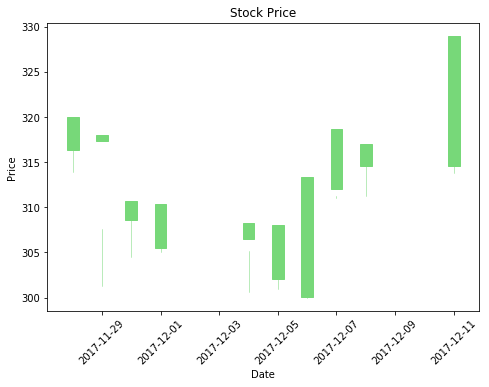

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import matplotlib.ticker as mticker

# As matplotlib.finance is deprecated so install mpl-finance => pip install mpl-finance
# from matplotlib.finance import candlestick_ohlc - is deprecated so use the below import statement
from mpl_finance import candlestick_ohlc

import numpy as np
import csv

dates = []
open_vals = []
close_vals = []
high_vals = []
low_vals = []
adj_vals = []
volumes = []

def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter
    
# Method - II to read the csv file into lists
dates, open_vals, close_vals, high_vals, low_vals, adj_vals, volumes = np.loadtxt('c:/users/anand/Exercises/Ex_MatplotLib/TSLA.csv',
                                                                                 delimiter=',',
                                                                                 unpack=True,
                                                                                 converters={0: bytespdate2num('%d-%m-%y')})

# Capture the figure
fig = plt.figure()

# Refer to subplot in the figure
ax1 = plt.subplot2grid((1,1), (0,0))

x = 0
y = len(dates)
ohlc = []

while x < y:
    append_me = dates[x], open_vals[x], high_vals[x], low_vals[x], close_vals[x], volumes[x]
    ohlc.append(append_me)
    x+=1

candlestick_ohlc(ax1, ohlc, width=0.4, colorup = '#77d879', colordown = '#db3f3f')

# To tilt x axis labels
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(45)

# To set date format
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))


plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price')
#plt.legend()

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=.2, hspace=.2)

plt.show()
